In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotnine
from plotnine import *

In [2]:
""" This is code for simple GP regression. It assumes a zero mean GP Prior """


# This is the true unknown function we are trying to approximate
f = lambda x: np.sin(0.9*x).flatten()
#f = lambda x: (0.25*(x**2)).flatten()


# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 0.1
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

N = 10         # number of training points.
n = 50         # number of test points.
s = 0.00005    # noise variance.

# Sample some input points and noisy versions of the function evaluated at
# these points. 
X = np.random.uniform(-5, 5, size=(N,1))
y = f(X) + s*np.random.randn(N)

K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))

print(K.shape, '\n')

(10, 10) 



In [4]:
# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1) # n by 1 벡터로 변환


# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))

print(kernel(X, Xtest).shape)
print(Lk.shape)
mu = np.dot(Lk.T, np.linalg.solve(L, y))
print(len(mu))


# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)

print(n)
print(Xtest.shape,'\n')
print(s2.shape)
print(s2,'\n')
print(K_.shape, '\n')
# print(K_)

(10, 50)
(10, 50)
50
50
(50, 1) 

(50,)
[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 9.99999968e-01 9.99995560e-01 9.99728086e-01 9.92760440e-01
 9.16202435e-01 5.78313919e-01 7.74587423e-02 1.22552794e-01
 6.37176960e-01 9.34776006e-01 9.94902484e-01 9.99826800e-01
 9.99997438e-01 9.99999074e-01 9.99910731e-01 9.96428912e-01
 9.43216347e-01 6.51007108e-01 1.62196242e-01 1.43604173e-03
 1.09051105e-03 2.55654276e-03 2.02862429e-02 5.42571849e-03
 1.57114730e-01 6.65904398e-01 9.45917049e-01 9.96349007e-01
 9.98956701e-01 9.79920701e-01 8.21589626e-01 3.55715317e-01
 9.77978739e-03 2.04086271e-02 9.62271505e-04 8.17081979e-03
 1.46446197e-02 6.17597906e-03 4.71743522e-02 2.58385034e-02
 1.09983141e-01 6.14234830e-01] 

(50, 50) 



(-5.0, 5.0, -3.0, 3.0)

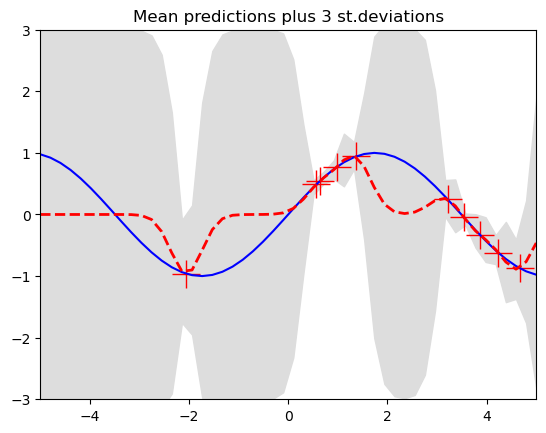

In [5]:
# PLOTS:
plt.figure(1)
plt.clf()

plt.plot(X, y, 'r+', ms=20)

plt.plot(Xtest, f(Xtest), 'b-')
plt.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#dddddd")

plt.plot(Xtest, mu, 'r--', lw=2)
plt.savefig('predictive.png', bbox_inches='tight')
plt.title('Mean predictions plus 3 st.deviations')
plt.axis([-5, 5, -3, 3])

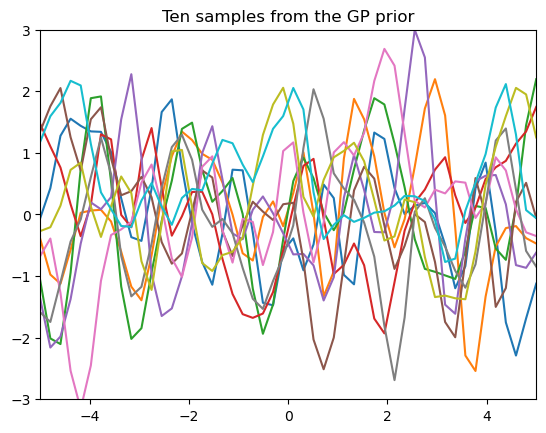

In [6]:
# draw samples from the prior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,10)))
plt.figure(2)
plt.clf()
plt.plot(Xtest, f_prior)
plt.title('Ten samples from the GP prior')
plt.axis([-5, 5, -3, 3])
plt.savefig('prior.png', bbox_inches='tight')

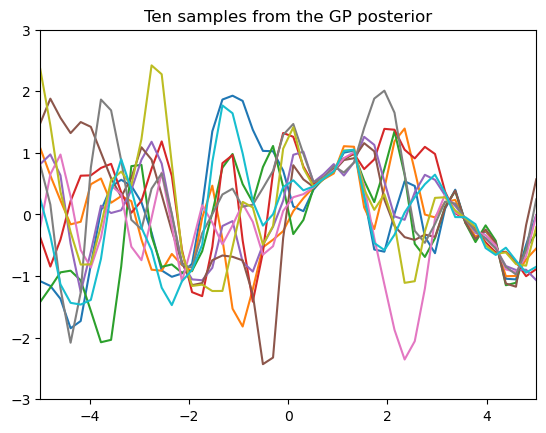

In [8]:
# draw samples from the posterior at our test points.
# 매트릭스에서 빼주는 요소가 노이즈를 감소해 준다.
# 
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk)) 

f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,10)))

plt.figure(3)
plt.clf()
plt.plot(Xtest, f_post)
plt.title('Ten samples from the GP posterior')
plt.axis([-5, 5, -3, 3])
plt.savefig('post.png', bbox_inches='tight')

plt.show()

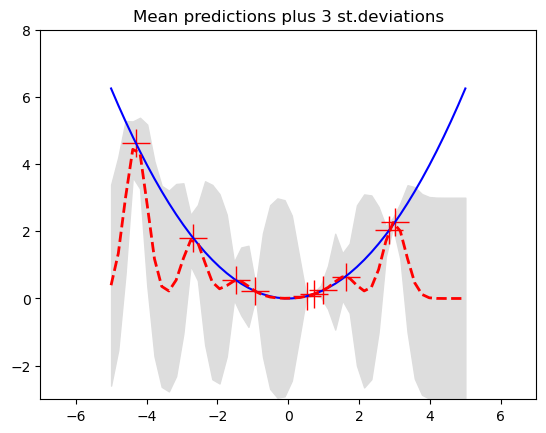

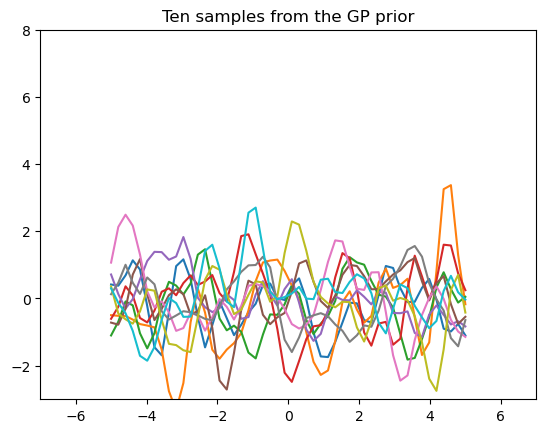

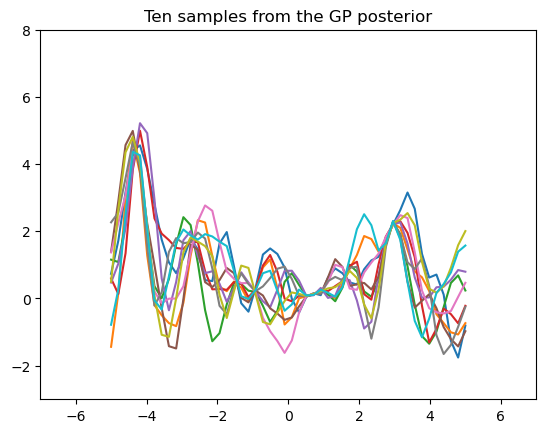

In [9]:
# 여기서 f는 함수임.
f = lambda x: (0.25*(x**2)).flatten()
# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 0.1
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

N = 10         # number of training points.
n = 50         # number of test points.
s = 0.00005    # noise variance.

# Sample some input points and noisy versions of the function evaluated at
# these points. 
X = np.random.uniform(-5, 5, size=(N,1))
y = f(X) + s*np.random.randn(N)

K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))

# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1) # n by 1 벡터로 변환

# print(kernel(X, Xtest).shape)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))
# print(Lk.shape)
mu = np.dot(Lk.T, np.linalg.solve(L, y))
# print(len(mu))


# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)

# PLOTS:
plt.figure(1)
plt.clf()

plt.plot(X, y, 'r+', ms=20)

plt.plot(Xtest, f(Xtest), 'b-')
plt.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#dddddd")

plt.plot(Xtest, mu, 'r--', lw=2)
plt.savefig('predictive2.png', bbox_inches='tight')
plt.title('Mean predictions plus 3 st.deviations')
plt.axis([-7, 7, -3, 8])

# draw samples from the prior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,10)))
plt.figure(2)
plt.clf()
plt.plot(Xtest, f_prior)
plt.title('Ten samples from the GP prior')
plt.axis([-7, 7, -3, 8])
plt.savefig('prior2.png', bbox_inches='tight')

# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))

f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,10)))

plt.figure(3)
plt.clf()
plt.plot(Xtest, f_post)
plt.title('Ten samples from the GP posterior')
plt.axis([-7, 7, -3, 8])
plt.savefig('post.png', bbox_inches='tight')

plt.show()

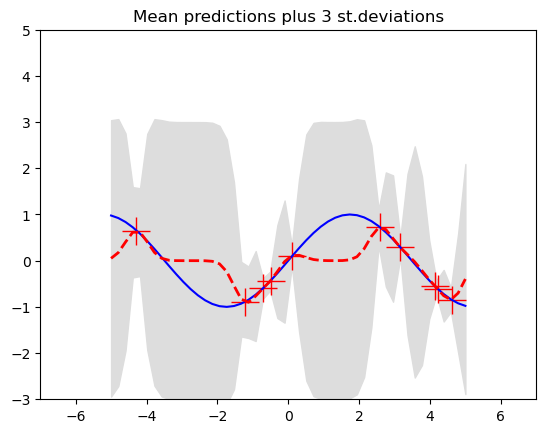

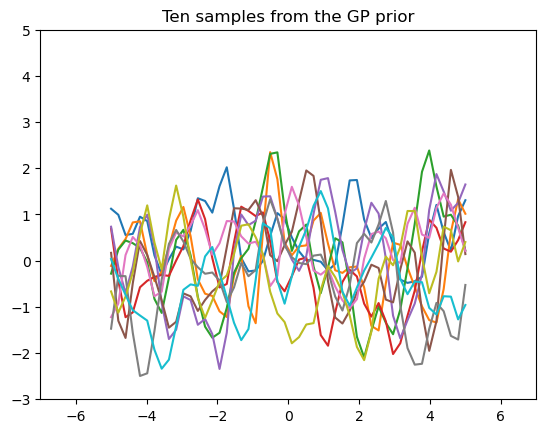

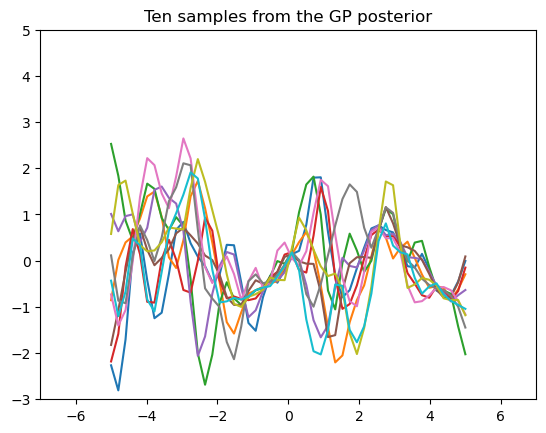

In [11]:
# 여기서 f는 함수임.

f = lambda x: np.sin(0.9*x).flatten()
# f = lambda x: (0.25*(x**2)).flatten()
# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 0.1
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

N = 10         # number of training points.
n = 50         # number of test points.
s = 0.005    # noise variance. 0.00005

# Sample some input points and noisy versions of the function evaluated at
# these points. 
X = np.random.uniform(-5, 5, size=(N,1))
y = f(X) + s*np.random.randn(N)

K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))

# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1) # n by 1 벡터로 변환

# print(kernel(X, Xtest).shape)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))
# print(Lk.shape)
mu = np.dot(Lk.T, np.linalg.solve(L, y))
# print(len(mu))


# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)

# PLOTS:
plt.figure(1)
plt.clf()

plt.plot(X, y, 'r+', ms=20)

plt.plot(Xtest, f(Xtest), 'b-')
plt.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#dddddd")

plt.plot(Xtest, mu, 'r--', lw=2)
plt.savefig('predictive2.png', bbox_inches='tight')
plt.title('Mean predictions plus 3 st.deviations')
plt.axis([-7, 7, -3, 5])

# draw samples from the prior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,10)))
plt.figure(2)
plt.clf()
plt.plot(Xtest, f_prior)
plt.title('Ten samples from the GP prior')
plt.axis([-7, 7, -3, 5])
plt.savefig('prior2.png', bbox_inches='tight')

# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))

f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,10)))

plt.figure(3)
plt.clf()
plt.plot(Xtest, f_post)
plt.title('Ten samples from the GP posterior')
plt.axis([-7, 7, -3, 5])
plt.savefig('post.png', bbox_inches='tight')

plt.show()